In [30]:
import numpy as np
import math
import csv
from proj1_helpers import *
from Hadrien import *
from ML_methods import *
from features_engineering import *
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
y, tx, ids = load_csv_data("data_csv/train.csv", sub_sample=True)

In [3]:
print("y has shape {0}".format(y.shape))
print("X has shape {0}".format(tx.shape))

y has shape (5000,)
X has shape (5000, 30)


### Feature Normalization

In [32]:
## TODO : remove NAN before standardization, or at least not consider them in np.mean() and np.std.
tx_nan = transform_to_nan(tx, -900)
#tx_nan_norm, mean_x, std_x = standardize_with_nan(tx_nan)

In [66]:
#met les nan a 0
tx_zero = transform_nan_to_zero(tx_nan)
tx_nan_mean, mean =transform_to_mean(tx_zero)
#mean = tx_nan.mean(0)
print(mean)

IndexError: index 30 is out of bounds for axis 1 with size 30

###  Divide selon feature 22

In [38]:
tx0, y0, tx1, y1, tx2, y2, tx3, y3 = separate_PRI_jet_num(tx_nan_mean, y)
print("tx0 has shape {tx0} and y0 has shape {y0}".format(tx0=tx0.shape, y0=y0.shape))
print("tx1 has shape {tx1} and y1 has shape {y1}".format(tx1=tx1.shape, y1=y1.shape))
print("tx2 has shape {tx2} and y2 has shape {y2}".format(tx2=tx2.shape, y2=y2.shape))
print("tx3 has shape {tx3} and y3 has shape {y3}".format(tx3=tx3.shape, y3=y3.shape))

tx0 has shape (1985, 30) and y0 has shape (1985,)
tx1 has shape (1540, 30) and y1 has shape (1540,)
tx2 has shape (1043, 30) and y2 has shape (1043,)
tx3 has shape (432, 30) and y3 has shape (432,)


### Feature Distribution

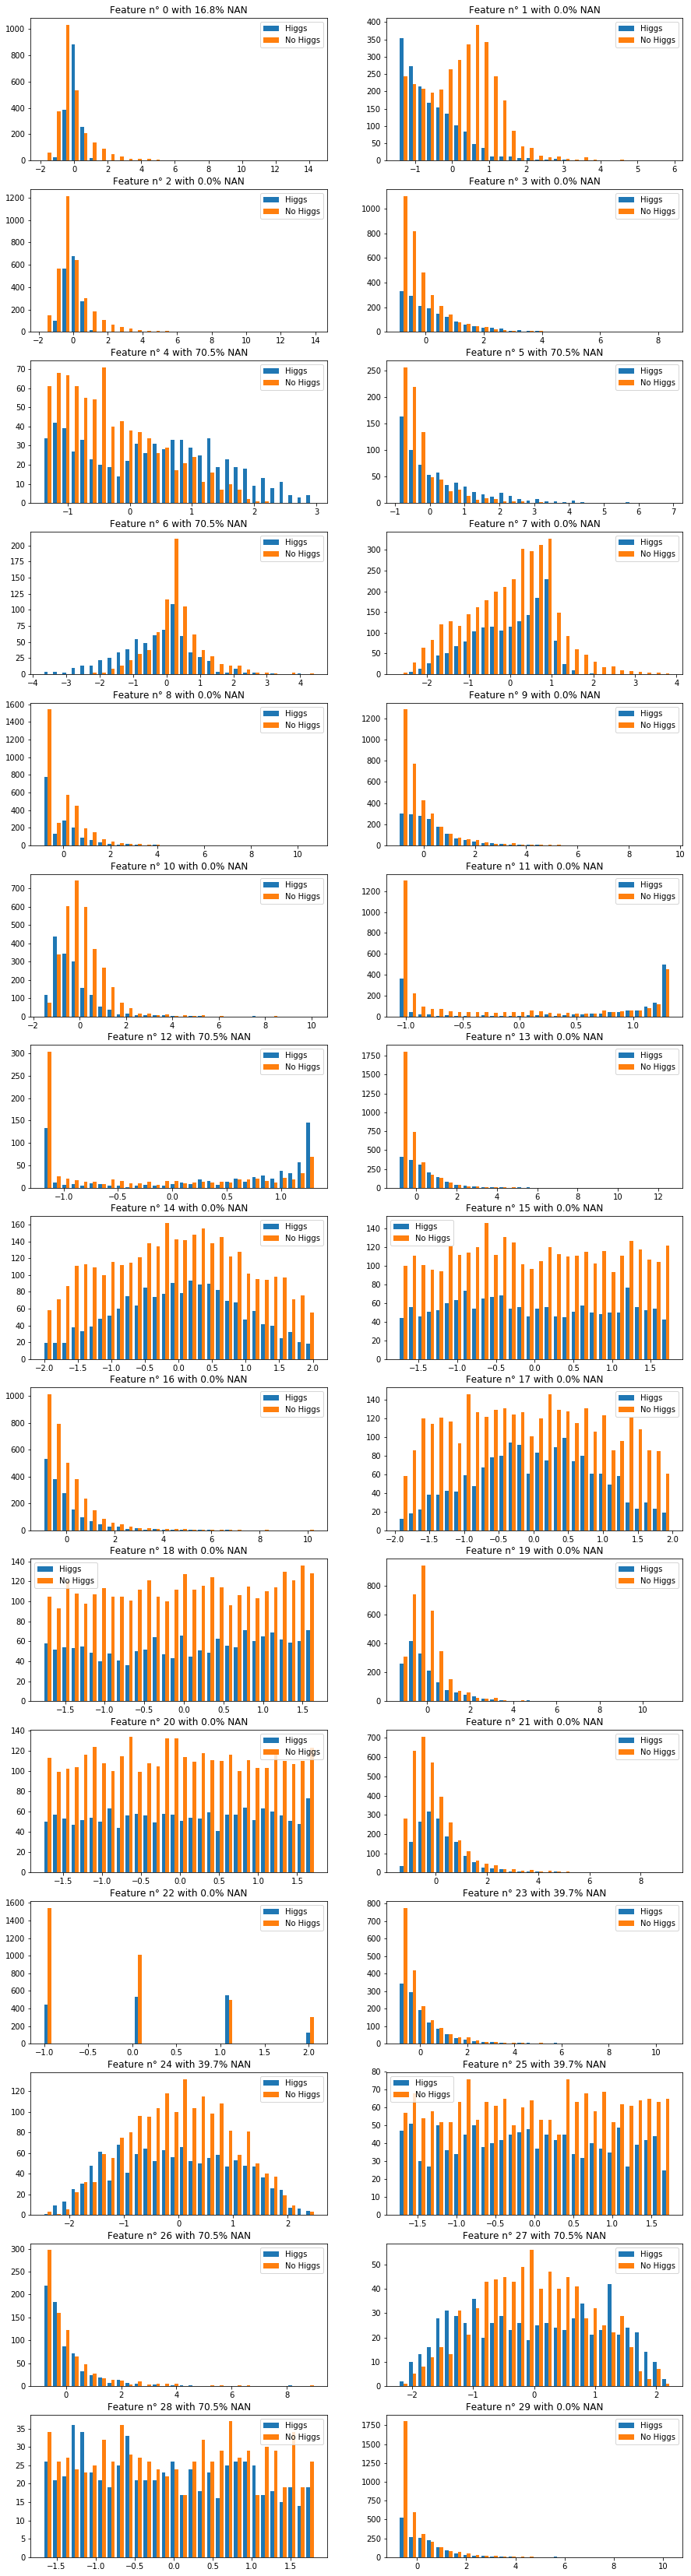

In [10]:
display_feature_distribution(y, tx_nan_norm, 30)


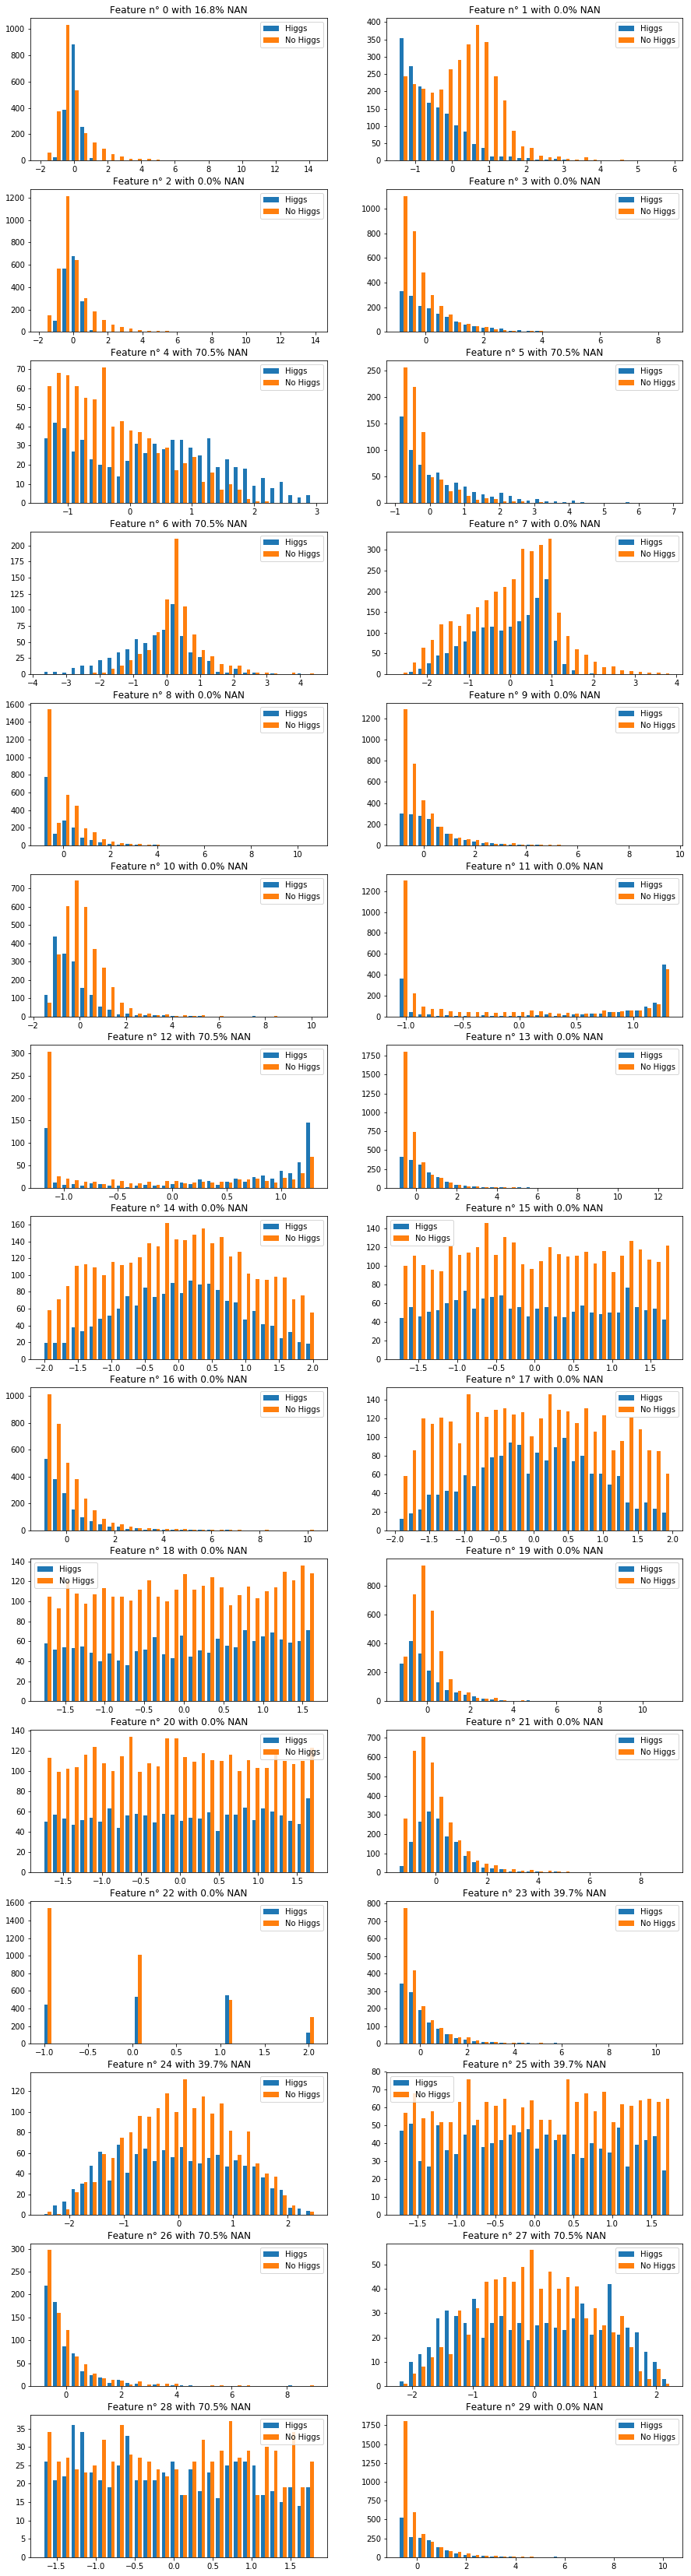

In [36]:
#display features with nan at the mean and no standardization
display_feature_distribution(y, tx_nan_norm, 30)

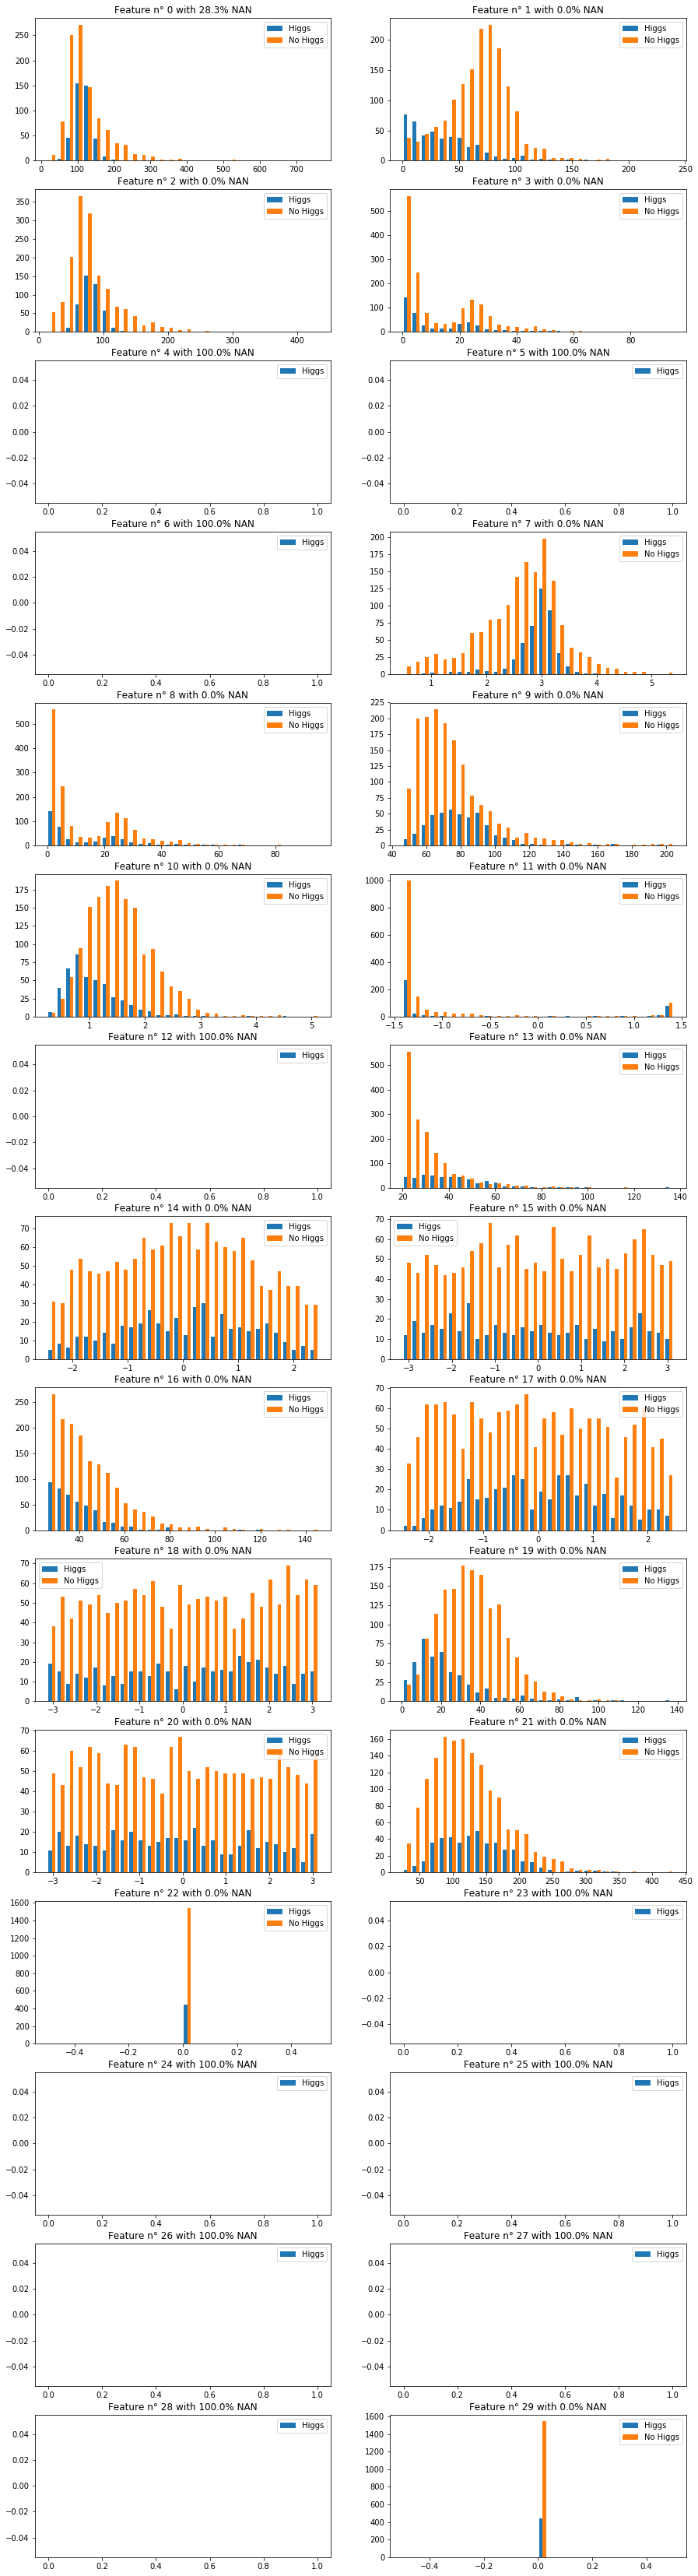

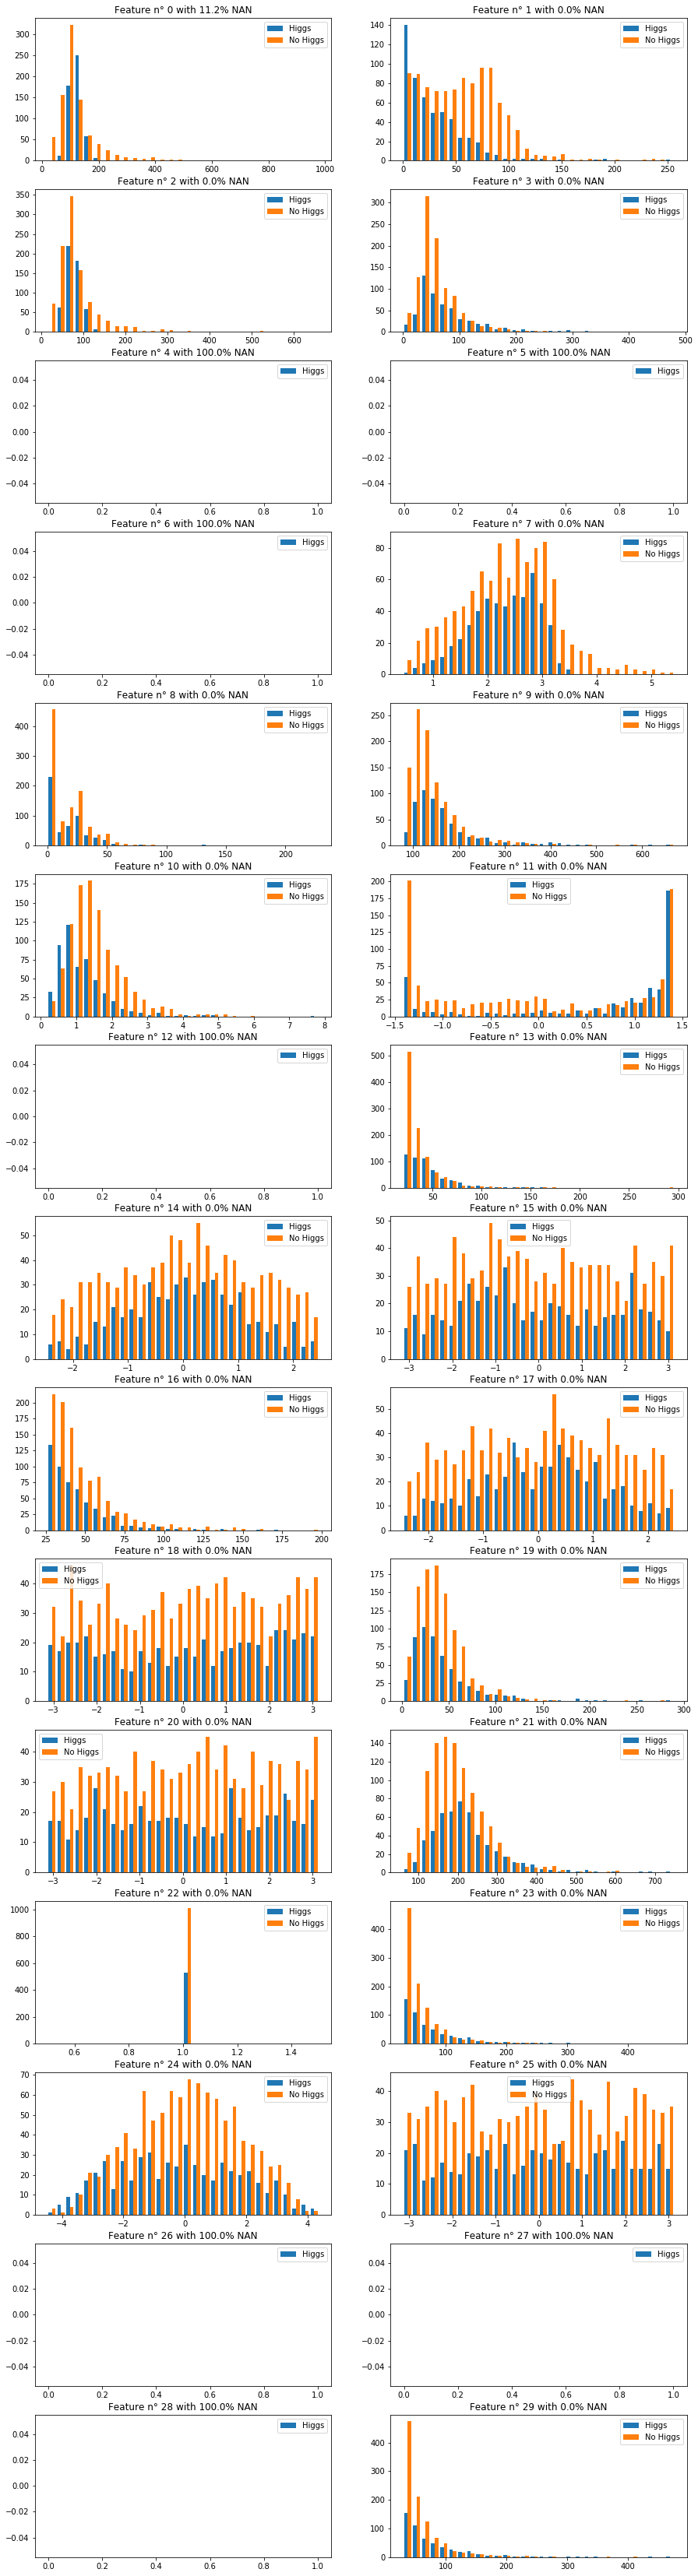

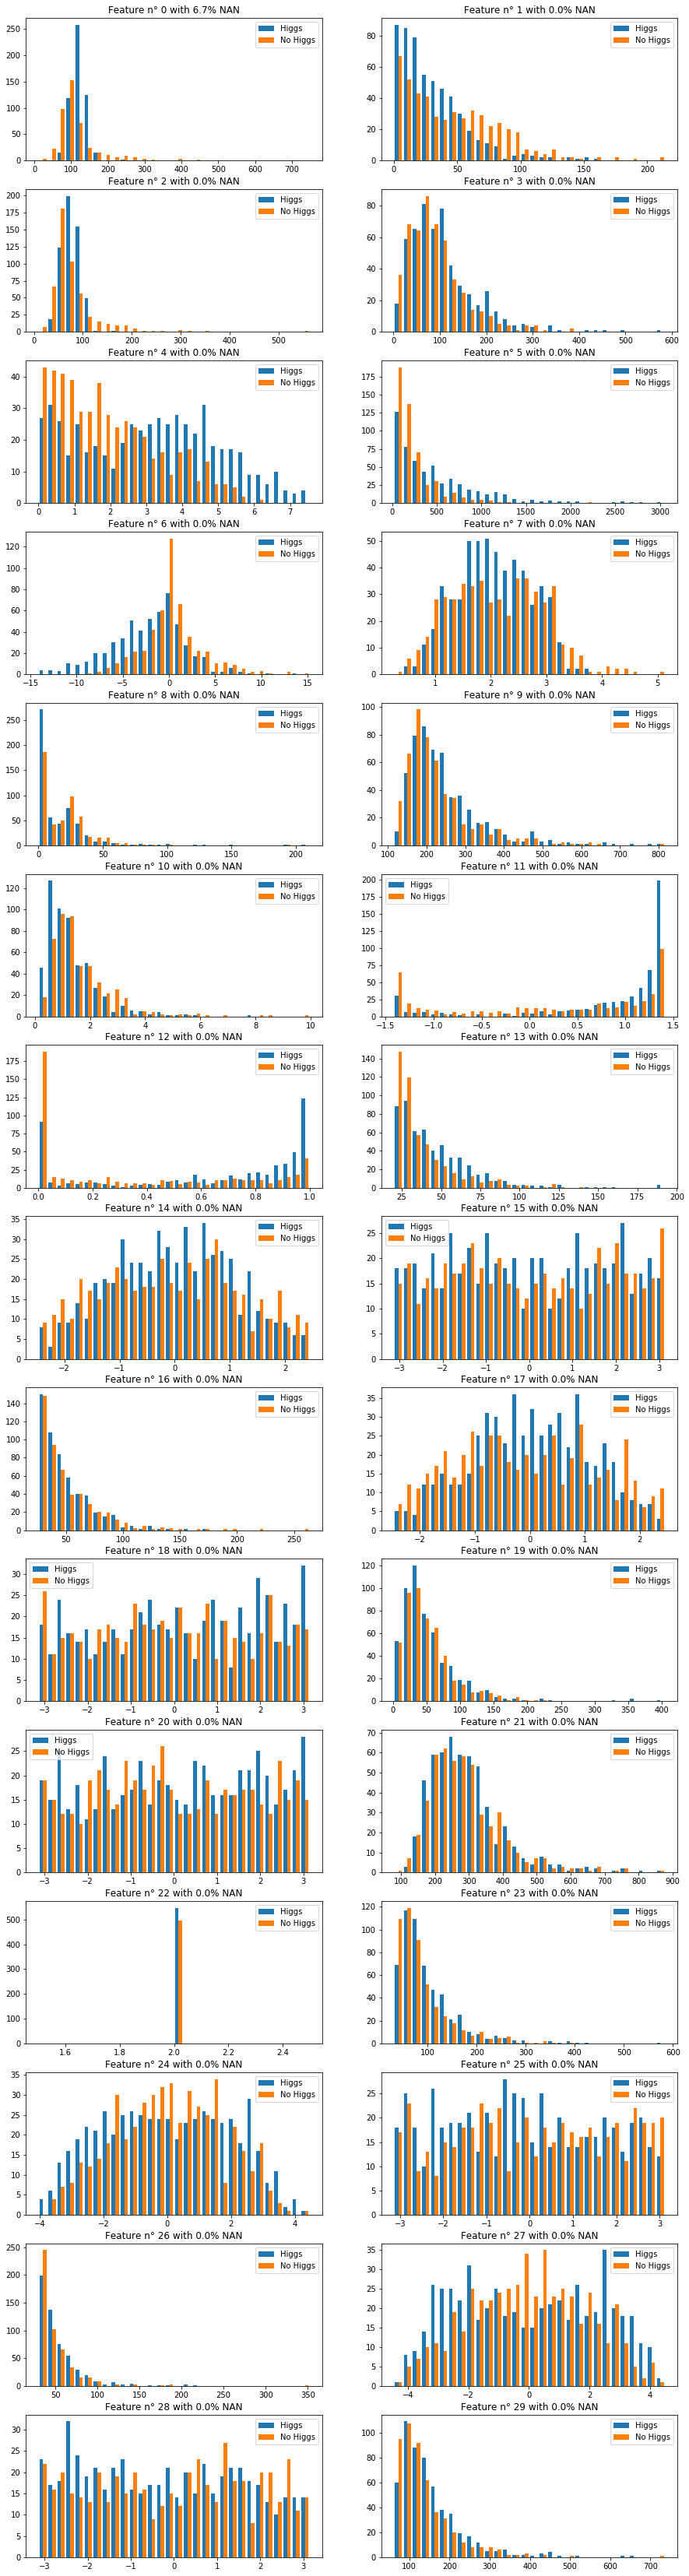

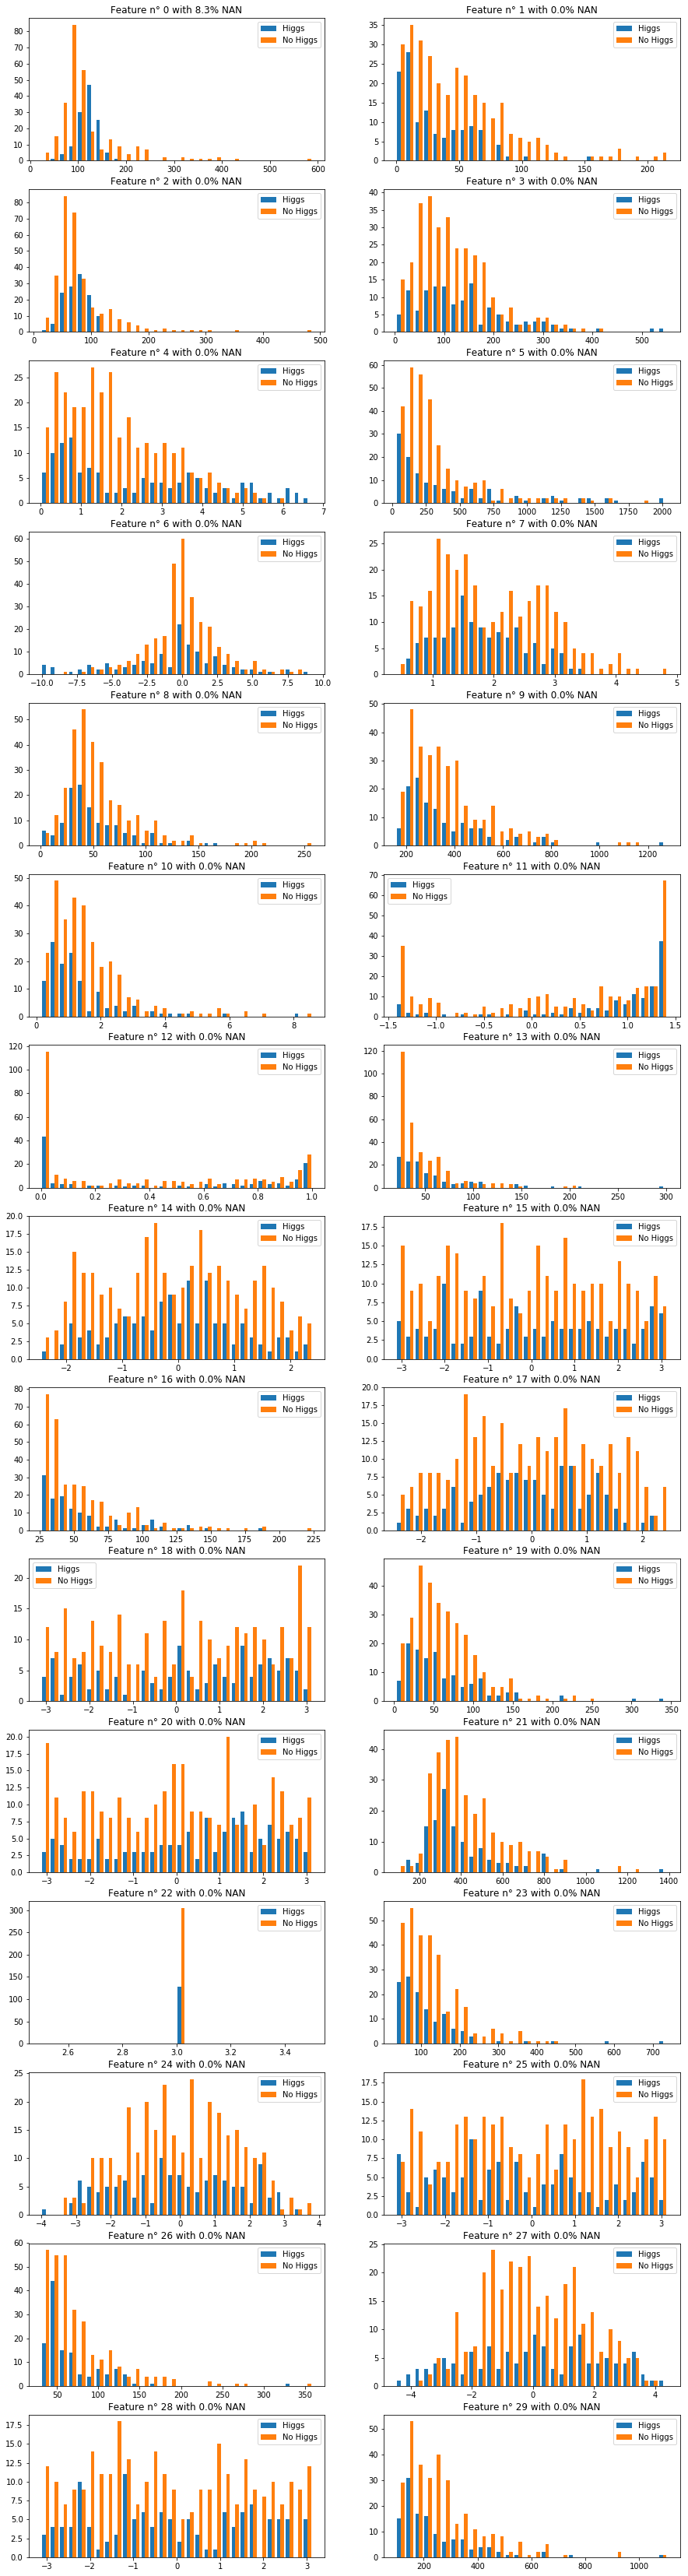

In [41]:
#feature distribution for the different groups tx0, tx1, tx2 and tx3
display_feature_distribution(y0, tx0, 30)
#print('group2')
display_feature_distribution(y1, tx1, 30)
display_feature_distribution(y2, tx2, 30)
display_feature_distribution(y3, tx3, 30)

### Modify Feature Distribution 

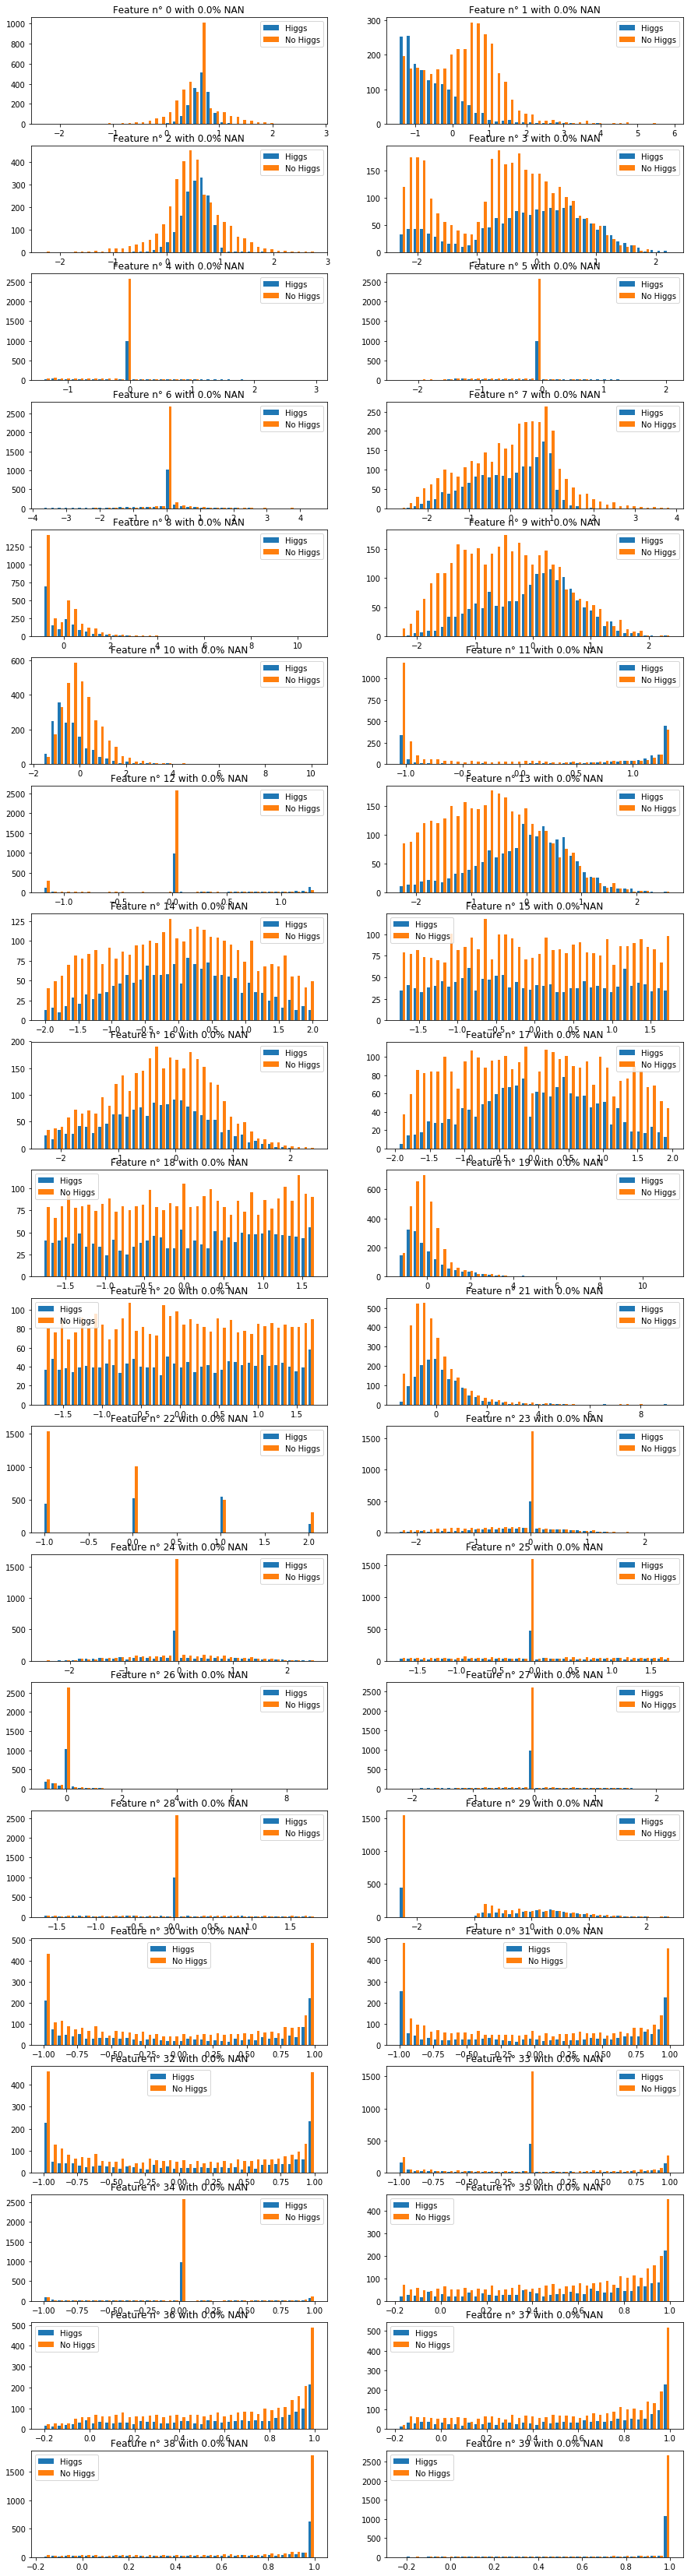

In [11]:
tx_0_norm = transform_nan_to_zero(tx_nan_norm)
features_log = [0, 2, 3, 5, 9, 13, 16, 23, 29]
features_sin_cos = [15, 18, 20, 25, 28]

tx_0_norm_adujsted_log = transform_feature_log(tx_0_norm, features_log)
tx_0_norm_adujsted_log_sin = transform_feature_sin(tx_0_norm_adujsted_log, features_sin_cos)
tx_0_norm_adujsted_log_sin_cos = transform_feature_cos(tx_0_norm_adujsted_log_sin, features_sin_cos)

txx = tx_0_norm_adujsted_log_sin_cos
display_feature_distribution(y, txx, 40)





### Train model 

#### Least Square Gradient Descent



In [14]:
#l = nb lignes in x and c = nb columns in x
(l, c) = np.shape(txx)
#initialise le w initial à n dim à 0
initial_w_gd = np.zeros(c)
max_iters = 10
gamma = 0.25
gd_losses, gd_ws = gradient_descent(y, txx, initial_w_gd, max_iters, gamma)

Gradient Descent(0/9): loss=1.0, w0=-0.04179268796602373, w1=-0.08378602898962993
Gradient Descent(1/9): loss=0.7286610848698903, w0=-0.00851760512171433, w1=-0.10301242010355612
Gradient Descent(2/9): loss=0.8538455827324142, w0=-0.028295156652876803, w1=-0.14532113803750227
Gradient Descent(3/9): loss=0.6904120129030497, w0=-0.00019200899504020347, w1=-0.14819711969386754
Gradient Descent(4/9): loss=0.7937188599435065, w0=-0.014972947332762408, w1=-0.17419904793246635
Gradient Descent(5/9): loss=0.6761922368436195, w0=0.006080271405765551, w1=-0.1732394959004403
Gradient Descent(6/9): loss=0.7594890624454703, w0=-0.005532393835648502, w1=-0.19148964751473815
Gradient Descent(7/9): loss=0.6706033460536049, w0=0.010201534999000044, w1=-0.19008886708795517
Gradient Descent(8/9): loss=0.7369030586201895, w0=0.0011910194160044893, w1=-0.20375665812589963
Gradient Descent(9/9): loss=0.669247596396281, w0=0.013071590905480594, w1=-0.20271998486757212


#### Least Square Stochastic Gradient Descent

In [16]:
#l = nb lignes in x and c = nb columns in x
(l, c) = np.shape(txx)
#initialise le w initial à 30 dim à 0
initial_w_sgd = np.zeros(c)
max_iters_sgd = 10
gamma_sgd = 0.04
sgd_losses, sgd_ws = stochastic_gradient_descent(y, txx, initial_w_sgd,10,  max_iters_sgd, gamma_sgd)

SGD(0/9): loss=0.48055826813084623, w0=-0.00680877789553345, w1=-0.004201861025236286
SGD(1/9): loss=0.45959456903842183, w0=0.0017911416241112987, w1=-0.022562546574616055
SGD(2/9): loss=0.4283781872579659, w0=-0.006547882858376729, w1=-0.03409227342723294
SGD(3/9): loss=0.422475743870666, w0=-0.005680899829190946, w1=-0.031128613348286843
SGD(4/9): loss=0.4096033761267466, w0=-0.009576471460149515, w1=-0.028073057156648568
SGD(5/9): loss=0.44476167219863455, w0=-0.02506728429058247, w1=-0.010250668664291158
SGD(6/9): loss=0.4272863111659575, w0=-0.029442433051849296, w1=-0.01221918939855268
SGD(7/9): loss=0.41030817043404766, w0=-0.023911048078445216, w1=-0.028071137521495662
SGD(8/9): loss=0.3937314629932141, w0=-0.021199286360004302, w1=-0.0449175956383792
SGD(9/9): loss=0.3800875589911253, w0=-0.026512112038881687, w1=-0.049083733633664695


#### Least Square

In [18]:
weight = least_squares(y, txx)
losses = compute_loss(y, txx, weight)
print("weights : {0}".format(weight))
print("losses : {0}".format(losses))

weights : [ 0.11051554 -0.2568357  -0.32113174 -0.07081299  0.49652604 -0.49102522
 -0.04901669  0.1770458   0.01579191  0.03954131  0.10391632  0.12438019
  0.13730787  0.36100783  0.00545586 -0.01328455  0.03348455  0.02539963
 -0.07338907  0.06837654 -0.03006469 -0.0847102  -0.21784139  0.04543065
 -0.03770506  0.0166237   0.06115731  0.00725961 -0.06214666  0.19787683
  0.01367538  0.11984668  0.03025817 -0.02170751  0.06292839 -0.00616231
 -0.01642778  0.00290473  0.05202917  0.00379839]
losses : 0.32201628761540085


#### Ridge Regression

In [20]:
#for different lambdas
lambdas = np.logspace(-100, 100, 200);
#ridge reggression for different lambda
losses = []
for index, lambda_ in enumerate(lambdas):
    weight = ridge_regression(y, txx, lambda_)
    losses.append(compute_loss(y, txx, weight))
print(losses)

[0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.3220162876